In [27]:
import pandas as pd
import numpy as np

In [28]:
df = pd.read_csv('C:\\Users\ge289\Documents\Jupiter Projects\z_df.csv')
df.head()

,Plate,Row,Column,Cotreatment,Control,Value,DrugID,Norm.Value,Norm.ValueTwo,Zscore
0,B007579,B,2,False,True,31794.0,DMSO,0.940178,0.940178,-0.329068
1,B007579,B,3,False,False,35595.0,BCC0119301,1.052577,1.052577,-0.252022
2,B007579,B,4,False,False,36694.0,BCC0108600,1.085076,1.085076,-0.229745
3,B007579,B,5,False,False,35061.0,BCC0100667,1.036786,1.036786,-0.262846
4,B007579,B,6,False,False,33476.0,BCC0102219,0.989916,0.989916,-0.294974


In [29]:
df.copy()
df.drop(['Plate', 'Row', 'Column', 'Control'], axis=1, inplace=True)
df.drop(df[df['DrugID'] == 'DMSO'].index, axis=0, inplace=True)
df.head()

,Cotreatment,Value,DrugID,Norm.Value,Norm.ValueTwo,Zscore
1,False,35595.0,BCC0119301,1.052577,1.052577,-0.252022
2,False,36694.0,BCC0108600,1.085076,1.085076,-0.229745
3,False,35061.0,BCC0100667,1.036786,1.036786,-0.262846
4,False,33476.0,BCC0102219,0.989916,0.989916,-0.294974
5,False,39629.0,BCC0102617,1.171866,1.171866,-0.170253


In [30]:
df = df.set_index('DrugID')

In [31]:
df_alone = df[df['Cotreatment'] == False]
df_cotreat = df[df['Cotreatment'] == True]

In [32]:
df_alone.copy()
df_cotreat.copy()
df_alone.drop(['Norm.ValueTwo', 'Cotreatment'], axis=1, inplace=True)
df_cotreat.drop(['Norm.Value','Cotreatment'], axis=1, inplace=True)

C:\Users\ge289\AppData\Local\Temp\ipykernel_14656\3417684764.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alone.drop(['Norm.ValueTwo', 'Cotreatment'], axis=1, inplace=True)
C:\Users\ge289\AppData\Local\Temp\ipykernel_14656\3417684764.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cotreat.drop(['Norm.Value','Cotreatment'], axis=1, inplace=True)


In [33]:
df_alone.rename(columns={'Value' : 'alone' , 'Norm.Value' : 'Norm.alone', 'Zscore' : 'Z_score1'}, inplace=True)
df_cotreat.rename(columns={'Value' : '+hist' , 'Norm.ValueTwo' : 'Norm.+hist' , 'Zscore' : 'Z_score2'}, inplace=True)

C:\Users\ge289\AppData\Local\Temp\ipykernel_14656\1236669370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alone.rename(columns={'Value' : 'alone' , 'Norm.Value' : 'Norm.alone', 'Zscore' : 'Z_score1'}, inplace=True)
C:\Users\ge289\AppData\Local\Temp\ipykernel_14656\1236669370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cotreat.rename(columns={'Value' : '+hist' , 'Norm.ValueTwo' : 'Norm.+hist' , 'Zscore' : 'Z_score2'}, inplace=True)


In [34]:
new_df = df_alone.merge(df_cotreat,
                        how='outer',
                        on='DrugID',
                        validate='m:1')
new_df.head()

,alone,Norm.alone,Z_score1,+hist,Norm.+hist,Z_score2
DrugID,,,,,,
BCC0119301,35595.0,1.052577,-0.252022,180959.0,0.967972,-0.666056
BCC0108600,36694.0,1.085076,-0.229745,158039.0,0.845370,-0.961816
BCC0100667,35061.0,1.036786,-0.262846,186202.0,0.996018,-0.598401
BCC0102219,33476.0,0.989916,-0.294974,192196.0,1.028080,-0.521054
BCC0102617,39629.0,1.171866,-0.170253,187306.0,1.001923,-0.584155


In [35]:
new_df.copy()
new_df_clean = new_df.dropna()

In [36]:
mean = new_df_clean['Norm.+hist'].mean()
std = new_df_clean['Norm.+hist'].std()
for index, row in new_df_clean.iterrows():
    new_df_clean.loc[index, 'Z_score2'] = (new_df_clean.loc[index, 'Norm.+hist'] - mean) / std

C:\Users\ge289\AppData\Local\Temp\ipykernel_14656\483806829.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_clean.loc[index, 'Z_score2'] = (new_df_clean.loc[index, 'Norm.+hist'] - mean) / std


In [37]:
new_df_clean.head()

,alone,Norm.alone,Z_score1,+hist,Norm.+hist,Z_score2
DrugID,,,,,,
BCC0119301,35595.0,1.052577,-0.252022,180959.0,0.967972,-0.642416
BCC0108600,36694.0,1.085076,-0.229745,158039.0,0.845370,-0.992315
BCC0100667,35061.0,1.036786,-0.262846,186202.0,0.996018,-0.562376
BCC0102219,33476.0,0.989916,-0.294974,192196.0,1.028080,-0.470871
BCC0102617,39629.0,1.171866,-0.170253,187306.0,1.001923,-0.545522


In [38]:
hit_df = new_df_clean.copy()
hit_df['Hit'] = False
hit_df.sort_values(by=['Z_score1', 'Z_score2'], axis=0, ascending=False, inplace=True)

In [39]:
#identify hits
for index, row in hit_df.iterrows():
    if hit_df.loc[index, 'Z_score1'] > 2.5 :
        hit_df.loc[index, 'Hit'] = 'Class I'
    elif (hit_df.loc[index, 'Z_score1'] < 1) & (hit_df.loc[index, 'Z_score2'] > 2.5) :
         hit_df.loc[index, 'Hit'] = 'Class II'
    elif (hit_df.loc[index, 'Z_score1'] < 1) & (hit_df.loc[index, 'Z_score2'] < -2.25) :
         hit_df.loc[index, 'Hit'] = 'Class III'
    else:
        hit_df.loc[index, 'Hit'] = 'No'

In [40]:
hit_df['Hit'].value_counts()

No           6369
Class I        88
Class II       55
Class III      18
Name: Hit, dtype: int64

In [41]:
hit_df.sort_values(by='Z_score1', inplace=True)

In [42]:
import seaborn as sns
sns.set(palette='deep')
import matplotlib.pyplot as plt

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [43]:
df = hit_df.sort_values(by='Z_score1')
df.head()

,alone,Norm.alone,Z_score1,+hist,Norm.+hist,Z_score2,Hit
DrugID,,,,,,,
BCC0106992,18721.0,0.373758,-0.717329,20818.0,0.119095,-3.065062,Class III
BCC0021074,29747.0,0.500572,-0.630403,140680.0,0.312114,-2.514198,Class III
BCC0031073,29722.0,0.515340,-0.620280,106598.0,0.304987,-2.534539,Class III
BCC0113277,25396.0,0.551398,-0.595563,200449.0,0.606059,-1.675295,No
BCC0070162,18456.0,0.581465,-0.574953,224094.0,1.349639,0.446838,No


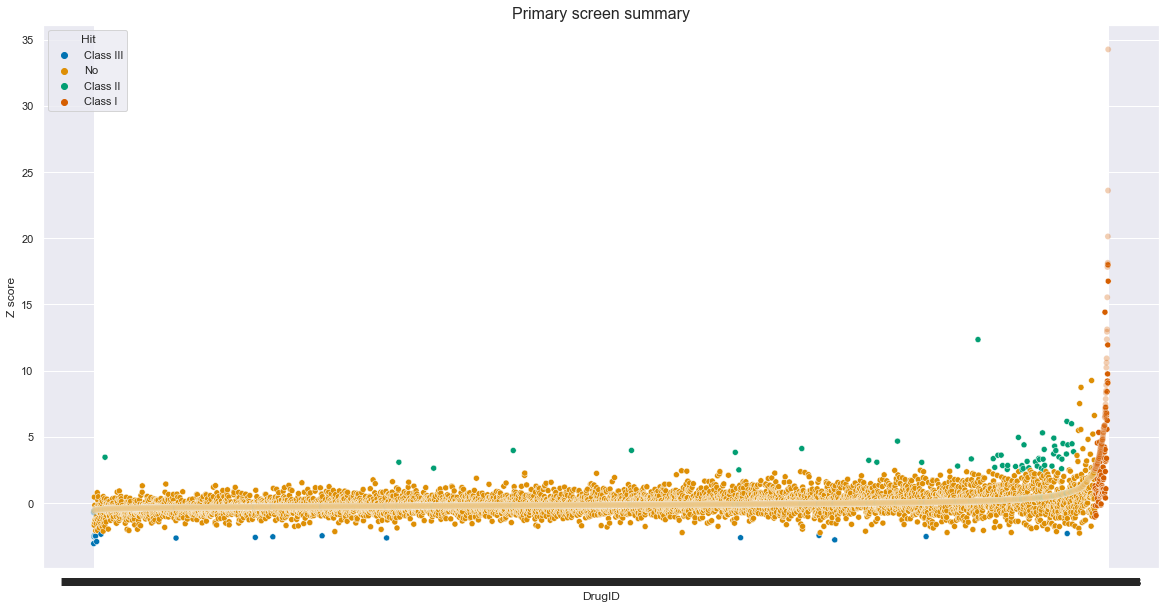

In [52]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df,
                  x='DrugID', 
                  y='Z_score2',
                  hue='Hit', 
                  palette='colorblind')
sns.scatterplot(data=df,
                  x='DrugID', 
                  y='Z_score1',
                  hue='Hit',
                alpha=0.3,
                  palette='colorblind',
               legend=False)
plt.title('Primary screen summary')
plt.ylabel('Z score')
plt.rcParams['font.size'] = 18
plt.rc('axes', titlesize=16)